In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.2 #set the value globally

# Average degree of the nearest neighbors

In [2]:
headerlist = ['chess','dolphins','eu_airlines','facebook','florentine_families','game_thrones','internet','jazz_collab','terrorists','AstroPh','CondMat','celegansInteractomes']
titlelist = ['Chess','Dolphins','EU Airlines','Facebook','Florentine Families','Game of Thrones','Internet','Jazz Collab','9-11 Terrorists','AstroPhysics Arxiv','Condensed Matter Arxiv','C. Elegans Interactomes']
graphlist = []

for hh in headerlist:
    graphlist.append(nx.read_gml('data/graph_'+hh+'.gml', label='id'))

In [3]:
deglist = []
avdeglist = []
for jj in range(len(headerlist)):
    G = graphlist[jj]
    deg = np.asarray([d for n, d in G.degree()])
    deglist.append(deg)
    avdeglist.append(np.average(deg))

In [4]:
graphranlist = []
for hh in headerlist:
    graphranlist.append(nx.read_gml('data_random/graph_'+hh+'_random.gml', label='id'))
    

In [ ]:
#TAKES TOO LONG
graphranlist = []
for jj in range(len(headerlist)):
    print(f'trying {headerlist[jj]} - N={len(graphlist[jj].nodes)}')
    
    graphranlist.append(nx.random_reference(graphlist[jj], niter=100, connectivity=False, seed=1234))

In [5]:
knnk = []
knnk_r = []
degvalues = []
degvalues_r = []
assor = []
assor_r = []

for jj in range(len(headerlist)):
    G = graphlist[jj]
    degvalues.append(np.unique(deglist[jj]))
    knnk1 = np.zeros(len(np.unique(deglist[jj])))
    knni = nx.average_neighbor_degree(G)
    for kk in range(len(np.unique(deglist[jj]))):
        listk = np.where(deglist[jj] == degvalues[jj][kk])[0]
        sumk=0
        for ii in listk:
            sumk += knni[ii]/len(listk)
        knnk1[kk] = sumk
    knnk.append(knnk1)
    assor.append(nx.degree_assortativity_coefficient(G))
    
    Gr = graphranlist[jj]
    degvalues_r.append(np.unique(deglist[jj]))
    knnk1 = np.zeros(len(np.unique(deglist[jj])))
    knni = nx.average_neighbor_degree(Gr)
    for kk in range(len(np.unique(deglist[jj]))):
        listk = np.where(deglist[jj] == degvalues_r[jj][kk])[0]
        sumk=0
        for ii in listk:
            sumk += knni[ii]/len(listk)
        knnk1[kk] = sumk
    knnk_r.append(knnk1)
    assor_r.append(nx.degree_assortativity_coefficient(Gr))

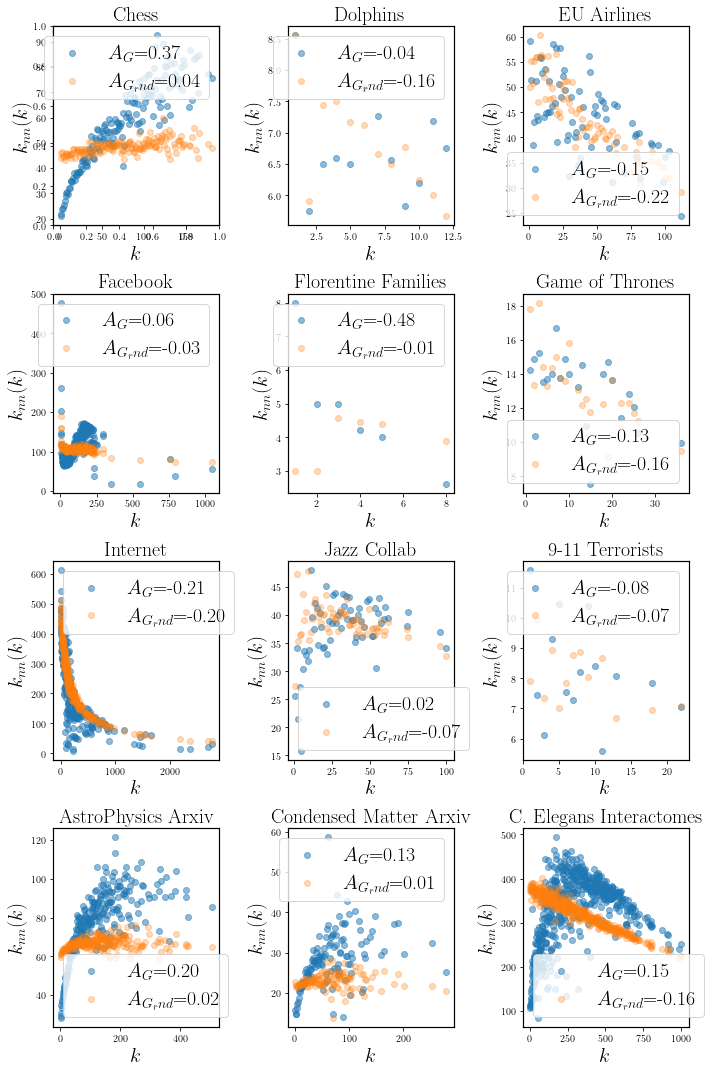

In [6]:
fig = plt.figure(figsize=(10, 15))
ax = plt.subplot(431)
for jj in range(len(headerlist)):
#     ax=fig.add_subplot(4,3,jj+1, sharex=ax, sharey=ax)
    ax=fig.add_subplot(4,3,jj+1)
    y,x = knnk[jj],degvalues[jj]
    ax.scatter(x,y, label="$A_G$="+str('%.2f' %assor[jj]), alpha=0.5)
    y1,x1 = knnk_r[jj], degvalues_r[jj]
    ax.scatter(x1,y1, label="$A_{G_rnd}$="+str('%.2f' %assor_r[jj]), alpha=0.3)
    plt.legend(loc='best', prop={'size':20}, frameon=True)
    ax.set_ylabel(r"$k_{nn}(k)$", fontsize=20)
    ax.set_xlabel(r"$k$", fontsize=20)
    ax.set_title(titlelist[jj], fontsize=20)
fig.tight_layout()
plt.show()

# Clustering and randomization

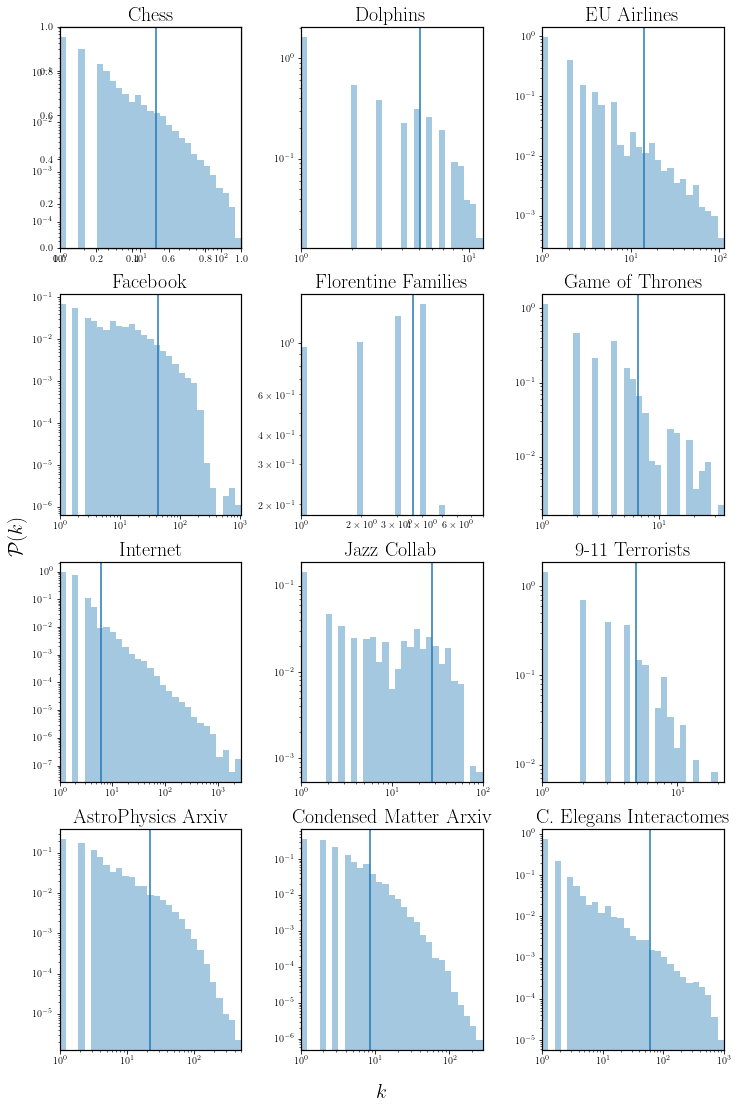

In [7]:
fig = plt.figure(figsize=(10, 15))
ax = plt.subplot(431)
for jj in range(len(headerlist)):
#     ax=fig.add_subplot(4,3,jj+1, sharex=ax, sharey=ax)
    ax=fig.add_subplot(4,3,jj+1)
    binlog = np.logspace(np.log10(min(deglist[jj])),np.log10(max(deglist[jj])), 30)
    ax.hist(deglist[jj], density=True, alpha=0.4, bins=binlog)
    ax.axvline(x=avdeglist[jj], ymin=0, ymax=1, label='\braket{k}')
    #     plt.legend(loc='best',prop={'size':sizeleg},frameon=True)
    ax.set_xlim([min(deglist[jj]),max(deglist[jj])])
    # ax.set_ylim([0.,1.])
    # ax.set_aspect('equal')
    ax.set_xscale('log')
    ax.set_yscale('log')
#     ax.tick_params(axis='both', width=0.4, length = 5., labelsize=10,direction='in')
    ax.set_title(titlelist[jj], fontsize=20)    
fig.text(0.5, -0.02, r"$k$", ha='center', fontsize=20)
fig.text(-0.02, 0.5, r"$\mathcal{P}(k)$", va='center', rotation='vertical', fontsize=20)
fig.tight_layout()
plt.show()


In [8]:
clustlist = []
for jj in range(len(headerlist)):
    G = graphlist[jj]
    clu = np.asarray([val for val in nx.clustering(G).values()])
    clustlist.append(clu)
    print(jj,headerlist[jj], np.mean(clustlist[jj]))

0 chess 0.17939575805920813
1 dolphins 0.2589582460550202
2 eu_airlines 0.4181521233419284
3 facebook 0.6055467186200862
4 florentine_families 0.44285714285714284
5 game_thrones 0.551443151559996
6 internet 0.28910040061431314
7 jazz_collab 0.6174507021536301
8 terrorists 0.48637155591614795
9 AstroPh 0.6328232091518613
10 CondMat 0.6417316374785175
11 celegansInteractomes 0.36668417652804974


In [9]:
clustranlist = []
for jj in range(len(headerlist)):
    GR = graphranlist[jj]
    cluran = np.asarray([val for val in nx.clustering(GR).values()])
    clustranlist.append(cluran)
    print(jj,headerlist[jj], np.mean(clustranlist[jj]))

0 chess 0.01762809900959261
1 dolphins 0.08619489829167248
2 eu_airlines 0.30492569149419707
3 facebook 0.06531425861399993
4 florentine_families 0.24539682539682542
5 game_thrones 0.21038214874845254
6 internet 0.16010067228203118
7 jazz_collab 0.2605163385949105
8 terrorists 0.1641077455119201
9 AstroPh 0.010674542675776423
10 CondMat 0.003578129688971076
11 celegansInteractomes 0.2637224017283983


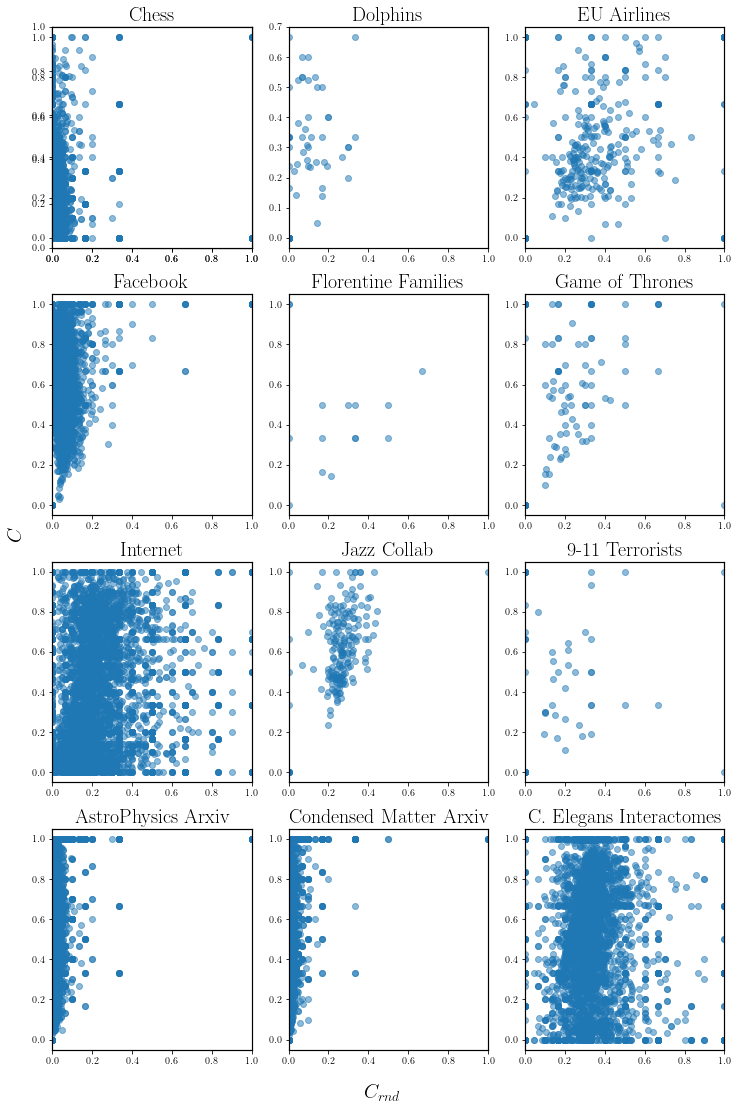

In [10]:
fig = plt.figure(figsize=(10, 15))
ax = plt.subplot(431)
for jj in range(len(headerlist)):
#     ax=fig.add_subplot(4,3,jj+1, sharex=ax, sharey=ax)
    ax=fig.add_subplot(4,3,jj+1)
    ax.scatter(clustranlist[jj], clustlist[jj], alpha=0.5)
    ax.set_title(titlelist[jj], fontsize=20)   
    ax.set_xlim([0,1])
fig.text(0.5, -0.02, r"$C_{rnd}$", ha='center', fontsize=20)
fig.text(-0.02, 0.5, r"$C$", va='center', rotation='vertical', fontsize=20)
fig.tight_layout()
plt.show()